In [749]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from mplsoccer import PyPizza, add_image, FontManager
import math
from PIL import Image
import imageio

In [750]:
#Read in CSV file
df = pd.read_csv('HeartsDataset-statsbomb.csv')

#Duplciate and rename these three columns as we want them at the end
df['PLAYER NUMBER NAME'] = df['PLAYER NUMBER']
df['Age_'] = df['Age']

In [751]:
#Dataset Preview
df.head()

,Default Radar Template,PLAYER NUMBER,Competition,Season,Age,Height,Country Id,Primary Position,Secondary Position,90s Played,Appearances,Minutes Played,Starting Appearances,Assists,Key Passes,Open Play Assists,Open Play Key Passes,Open Play xG Assisted,Set Piece Assists,Set Piece Key Passes,Set-Piece xG Assisted,xG Assisted,Dispossessed,Dribble%,Dribbles,Failed Dribbles,Fouls Won,Penalty wins,Successful Dribbles,Turnovers,Over/Underperformance,Scoring Contribution,Shots & Key Passes,xG & xG Assisted,Goal Conversion%,Goals & Penalty Goals,Non-Penalty Goals,Penalty Conversion%,Post Shot xG,Shooting%,Shots,Shot Touch%,xG,xG/Shot,Red Cards,Second Yellow Cards,Yellow Cards,Aggressive Actions,Average Defensive Action Distance,Ball Recoveries,Blocks/Shot,Clearances,Defensive Action Regains,Interceptions,Opposition Half Ball Recoveries,PAdj Clearances,PAdj Interceptions,Aerial Win%,Aerial Wins,Dribbled Past,Dribbles Successfully Defended%,Errors,Fouls,PAdj Tackles,PAdj Tackles & Interceptions,Tack/Dribbled Past%,Tackles,Tackles & Interceptions,Average Pressure Distance,Counterpressure Regains,Counterpressures,Counterpressures in Opposing Half,Counterpressures in Opposing Half%,PAdj Pressures,Pressure Regains,Pressures,Pressures in Opposing Half,Pressures in Opposing Half%,Claims - CCAA%,Goalkeeper Aggressive Distance,Pass into Danger%,Pass into Pressure%,Positive Outcome,Positive Outcome%,All Shots Faced,Expected Save%,Goals Conceded,Goals Saved Above Average,Penalties Conceded,Penalties Faced,Positioning Error,PSxG Faced,Save%,Shots Faced,Shots Faced On Target%,Shot Stopping%,xG Faced,Defensive Action OBV,Dribble & Carry OBV,Goalkeeper OBV,OBV,Pass OBV,Shot OBV,Crossing%,Deep Completions,Open Play Final Third Passes,OP Passes Into Box,Passes Inside Box,Passes Into Box,Passes + Touches In Box,Set Piece Passes Into Box,Successful Box Cross%,Successful Crosses,Throughballs,Touches In Box,Carries,Carry%,Carry Length,Deep Progressions,xGBuildup,xGChain,Final Third Pass Backward%,Final Third Pass Forward%,Final Third Pass Sideways%,Pass Backward%,Pass Forward%,Pass Sideways%,Average Pass Distance,Being Pressured Change in Pass%,Left to Right Footedness%,Long Ball%,Long Balls,Open Play Passes,Passes Being Pressured%,Passing%,Pressured Long Balls,Pressured Pass%,Unpressured Long Balls,Being Pressured Change in Pass Length,Pass Length,Pass Length Ratio,Pressured Pass Length,Pressured Pass Length Ratio,Successful Pass Length,Successful Pressured Pass Length,PLAYER NUMBER NAME,Age_
0,Full Back,1,National League,2021/2022,21,178.0,618,Right Wing Back,Right Back,19.650557,19,1768.5500,19,0.000000,0.610670,0.000000,0.610670,0.051887,0.000000,0.000000,0.000000,0.051887,0.661559,0.368421,0.966894,0.610670,0.407113,0.0,0.356224,1.628453,-0.062917,0.000000,0.865116,0.062917,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.254446,0.005285,0.011030,0.043348,0.000000,0.000000,0.254446,18.065645,34.840603,7.938706,0.034921,3.104238,3.562240,1.832009,2.900681,2.103385,1.337926,0.420455,1.882898,0.814226,0.548387,0.000000,1.170450,1.322500,2.660426,0.680000,1.730231,3.562240,39.243145,0.356224,3.155127,2.035566,0.645161,11.339953,2.137344,15.215854,5.546917,0.364548,0,0,0.324207,0.121037,2.854881,0.276764,0.0,0.0,0,0.0,0,0,0,0.0,0,0.0,NaN,NaN,0.0,0.052549,0.033955,NaN,0.223852,0.154008,-0.016660,0.360000,0.050889,5.394249,0.661559,0.050889,0.916005,1.170450,0.254446,0.333333,0.458002,0.000000,0.508891,18.676317,0.882834,4.595624,2.798903,0.325029,0.332919,0.103774,0.301887,0.594340,0.050432,0.422190,0.527378,55.429080,-0.176597,0.168000,0.240310,1.577563,24.223234,0.123919,0.583573,3.460462,0.406977,6.208476,-6.611394,22.042143,0.815293,15.430749,0.867905,17.970803,13.392430,1,21
1,Full Back,2,Major League Soccer,2021,24,180.0,916,Right Back,Right Centre Back,33.362774,32,3002.6497,32,0.299735,1.288862,0.269762,1.168967,0.146575,0.029974,0.119894,0.004740,0.151315,1.168967,0.506667,2.248015,1.109020,0.509550,0.0,1.138994,2.158094,0.144607,0.329709,1.9782

In [752]:
#Filter the dataset
#Minimum 500 mins
#27 years old or younger

df = df.loc[(df['Age']<28) & (df['Minutes Played']>500)]

In [753]:
#Seperating dataframe for player key information

df1 = df.filter(['PLAYER NUMBER NAME','Competition','Season'], axis=1)


In [754]:
#Convert all numeric values to Z-Scores, this is the maths distribution used to generate ratings
numeric_cols = df.select_dtypes(include=[np.number]).columns

df2 = df[numeric_cols].apply(zscore)

In [755]:
#Combine both the player info dataframe and Z-Score data frame together
#Values used to standarise z-scores to allow ratings to be on a 100 scale

newdf = pd.concat([df1,df2 * 15 + 50], axis = 1)

In [756]:
#Preview of dataframe with all zscores

newdf.head()

,PLAYER NUMBER NAME,Competition,Season,PLAYER NUMBER,Age,Height,Country Id,90s Played,Appearances,Minutes Played,Starting Appearances,Assists,Key Passes,Open Play Assists,Open Play Key Passes,Open Play xG Assisted,Set Piece Assists,Set Piece Key Passes,Set-Piece xG Assisted,xG Assisted,Dispossessed,Dribble%,Dribbles,Failed Dribbles,Fouls Won,Penalty wins,Successful Dribbles,Turnovers,Over/Underperformance,Scoring Contribution,Shots & Key Passes,xG & xG Assisted,Goal Conversion%,Goals & Penalty Goals,Non-Penalty Goals,Penalty Conversion%,Post Shot xG,Shooting%,Shots,Shot Touch%,xG,xG/Shot,Red Cards,Second Yellow Cards,Yellow Cards,Aggressive Actions,Average Defensive Action Distance,Ball Recoveries,Blocks/Shot,Clearances,Defensive Action Regains,Interceptions,Opposition Half Ball Recoveries,PAdj Clearances,PAdj Interceptions,Aerial Win%,Aerial Wins,Dribbled Past,Dribbles Successfully Defended%,Errors,Fouls,PAdj Tackles,PAdj Tackles & Interceptions,Tack/Dribbled Past%,Tackles,Tackles & Interceptions,Average Pressure Distance,Counterpressure Regains,Counterpressures,Counterpressures in Opposing Half,Counterpressures in Opposing Half%,PAdj Pressures,Pressure Regains,Pressures,Pressures in Opposing Half,Pressures in Opposing Half%,Claims - CCAA%,Goalkeeper Aggressive Distance,Pass into Danger%,Pass into Pressure%,Positive Outcome,Positive Outcome%,All Shots Faced,Expected Save%,Goals Conceded,Goals Saved Above Average,Penalties Conceded,Penalties Faced,Positioning Error,PSxG Faced,Save%,Shots Faced,Shots Faced On Target%,Shot Stopping%,xG Faced,Defensive Action OBV,Dribble & Carry OBV,Goalkeeper OBV,OBV,Pass OBV,Shot OBV,Crossing%,Deep Completions,Open Play Final Third Passes,OP Passes Into Box,Passes Inside Box,Passes Into Box,Passes + Touches In Box,Set Piece Passes Into Box,Successful Box Cross%,Successful Crosses,Throughballs,Touches In Box,Carries,Carry%,Carry Length,Deep Progressions,xGBuildup,xGChain,Final Third Pass Backward%,Final Third Pass Forward%,Final Third Pass Sideways%,Pass Backward%,Pass Forward%,Pass Sideways%,Average Pass Distance,Being Pressured Change in Pass%,Left to Right Footedness%,Long Ball%,Long Balls,Open Play Passes,Passes Being Pressured%,Passing%,Pressured Long Balls,Pressured Pass%,Unpressured Long Balls,Being Pressured Change in Pass Length,Pass Length,Pass Length Ratio,Pressured Pass Length,Pressured Pass Length Ratio,Successful Pass Length,Successful Pressured Pass Length,PLAYER NUMBER NAME,Age_
0,1,National League,2021/2022,24.173086,31.924075,NaN,48.915571,53.769037,48.656912,53.769035,54.733020,36.368399,41.853080,36.457047,43.694341,41.797741,46.891465,42.953489,44.346488,40.972818,40.509054,NaN,40.222240,46.315238,32.554153,46.103812,36.025793,47.139341,41.138406,34.624772,36.714295,36.746835,NaN,40.182544,40.329295,NaN,38.002782,NaN,36.749758,45.387019,37.847399,NaN,47.048772,46.865921,60.234419,59.777963,44.627566,46.506928,60.327342,63.857105,45.694629,39.737577,43.233601,50.747021,34.609515,42.451736,55.587125,48.175445,50.912820,43.392295,52.129213,38.286090,34.078316,46.638305,44.154553,39.792830,44.291925,55.590589,61.013451,56.969134,45.958258,47.764504,44.618079,62.661047,59.422201,51.384446,NaN,NaN,82.032145,57.185700,33.091915,43.404373,49.451179,49.451179,NaN,49.451179,NaN,NaN,NaN,49.451179,49.451179,49.451179,NaN,NaN,49.451179,59.048209,33.059473,NaN,47.560299,53.721145,NaN,58.890847,35.365509,32.690507,40.322257,37.225603,42.947909,33.717497,50.462691,46.787293,43.484782,39.815578,34.684886,24.729633,38.561562,43.523363,34.210076,45.014150,40.605586,37.593732,58.218499,51.408209,22.830201,80.594332,29.785298,58.673138,33.905841,54.019212,20.247868,39.010139,29.210270,49.117239,18.838244,59.573055,15.000727,59.417310,17.952036,63.185820,15.641632,36.757820,35.959940,47.524501,28.949025,24.173086,31.924075
1,2,Major League Soccer,2021,24.220904,51.614549,NaN,48.946801,75.397431,70.067058,75.397432,76.179382,87.266861,65.947181,84.136066,66.759533,68.967169,72.413800,53.970196,49.

In [757]:
# Weight and Ratings for metrics

#Overall minutes score
newdf['Minutes Score - (15%)'] = newdf['Minutes Played']

#Defending metrics
newdf['PAdjClearances'] = newdf['PAdj Clearances'] *0.1
newdf['PAdjTackles&Interceptions'] = newdf['PAdj Tackles & Interceptions'] *0.4
newdf['Blocks/Shot'] = newdf['Blocks/Shot'] *0.1
newdf['DribblesSuccessfullyDefended%'] = newdf['Dribbles Successfully Defended%'] *0.2
newdf['DefensiveActionRegains'] = newdf['Defensive Action Regains'] *0.2

#Overall defending score
newdf['Defending Score - (20%)'] = newdf['PAdjClearances'] + newdf['PAdjTackles&Interceptions'] + newdf['Blocks/Shot'] + newdf['DribblesSuccessfullyDefended%'] + newdf['DefensiveActionRegains']


#Aerial metrics
newdf['AerialWins'] = newdf['Aerial Wins'] *0.35
newdf['AerialWin%'] = newdf['Aerial Win%'] *0.65
#Overall aerial score
newdf['Aerial Score - (7.5%)'] = newdf['AerialWins'] + newdf['AerialWin%']


#Crossing metrics
newdf['SuccessfulCrosses'] = newdf['Successful Crosses'] *0.6
newdf['SuccessfulBoxCross%'] = newdf['Successful Box Cross%'] *0.4
#Overall crossing score
newdf['Crossing Score - (10%)'] = newdf['SuccessfulCrosses'] + newdf['SuccessfulBoxCross%']


#Dribbling metrixs
newdf['Dribble&CarryOBV'] = newdf['Dribble & Carry OBV'] *0.5
newdf['SuccessfulDribbles'] = newdf['Successful Dribbles'] *0.3
newdf['Carries_'] = newdf['Carries'] *0.2
#Overall dribbling score
newdf['Dribbling Score - (15%)'] = newdf['Dribble&CarryOBV'] + newdf['SuccessfulDribbles'] + newdf['Carries_']


#Creativity metrics
newdf['OBV_'] = newdf['OBV'] *0.5
newdf['OpenPlayxGAssisted'] = newdf['Open Play xG Assisted'] *0.3
newdf['OpenPlayKeyPasses'] = newdf['Open Play Key Passes'] *0.2
#Overall creativity score
newdf['Creativity Score - (20%)'] = newdf['OBV_'] + newdf['OpenPlayxGAssisted'] + newdf['OpenPlayKeyPasses']


#Ball Quality metrics
newdf['xGBuildup_'] = newdf['xGBuildup'] *0.4
newdf['DeepProgressions'] = newdf['Deep Progressions'] *0.3
newdf['OPPassesIntoBox'] = newdf['OP Passes Into Box'] *0.2
newdf['OpenPlayFinalThirdPasses'] = newdf['Open Play Final Third Passes'] *0.1
#Overall ball quality score
newdf['BallQuality Score - (12.5%)'] = newdf['xGBuildup_'] + newdf['DeepProgressions'] + newdf['OPPassesIntoBox'] + newdf['OpenPlayFinalThirdPasses']


In [758]:
#Creating a new dataframe with all attributes
newdf.drop(newdf.columns.difference(['PLAYER NUMBER NAME','Competition','Season','Minutes Score - (15%)','Defending Score - (20%)','Aerial Score - (7.5%)','Crossing Score - (10%)','Dribbling Score - (15%)','Creativity Score - (20%)','BallQuality Score - (12.5%)']), 1, inplace=True)
df3 = newdf
df3.columns = ['Player', 'Competition','Season','PLAYER NUMBER NAME', 'Minutes Score - (15%)', 'Defending Score - (20%)', 'Aerial Score - (7.5%)', 'Crossing Score - (10%)', 'Dribbling Score - (15%)', 'Creativity Score - (20%)', 'BallQuality Score - (12.5%)']
df3 = df3.drop('PLAYER NUMBER NAME', axis=1)

#Round overall attributes

df3 = df3.round({'Minutes Score - (15%)': 2})
df3 = df3.round({'Defending Score - (20%)': 2})
df3 = df3.round({'Aerial Score - (7.5%)': 2})
df3 = df3.round({'Crossing Score - (10%)': 2})
df3 = df3.round({'Dribbling Score - (15%)': 2})
df3 = df3.round({'Creativity Score - (20%)': 2})
df3 = df3.round({'BallQuality Score - (12.5%)': 2})

df3

,Player,Competition,Season,Minutes Score - (15%),Defending Score - (20%),Aerial Score - (7.5%),Crossing Score - (10%),Dribbling Score - (15%),Creativity Score - (20%),BallQuality Score - (12.5%)
0,1,National League,2021/2022,53.77,44.06,47.05,44.81,32.28,45.06,39.60
1,2,Major League Soccer,2021,75.40,59.04,48.80,62.25,59.98,72.09,69.74
2,3,Major League Soccer,2022,66.00,51.60,45.53,66.77,54.63,55.97,60.49
4,5,League Two,2021/2022,90.75,50.12,83.04,53.99,36.43,50.05,43.21
5,6,Premier Division,2021,48.70,40.07,48.89,31.01,43.98,36.06,30.39
6,7,National League,2022/2023,39.55,39.88,17.23,75.03,68.32,61.36,68.61
7,8,Superliga,2022/2023,39.45,39.17,52.48,54.94,52.54,59.59,63.87
8,9,Super Liga,2021/2022,74.07,50.41,52.15,60.66,44.97,53.19,50.00
11,12,Eliteserien,2021,32.95,45.83,40.26,60.46,33.58,54.41,44.49
13,14,Allsvenskan,2021,52.65,57.62,56.92,58.14,64.29,56.80,65.36


In [759]:
#Seperating dataframe from player key information

dfviz = df3.filter(['Player','Minutes Score - (15%)', 'Defending Score - (20%)', 'Aerial Score - (7.5%)', 'Crossing Score - (10%)', 'Dribbling Score - (15%)', 'Creativity Score - (20%)', 'BallQuality Score - (12.5%)'], axis=1)

['Player', 'Minutes Score - (15%)', 'Defending Score - (20%)', 'Aerial Score - (7.5%)', 'Crossing Score - (10%)', 'Dribbling Score - (15%)', 'Creativity Score - (20%)', 'BallQuality Score - (12.5%)']


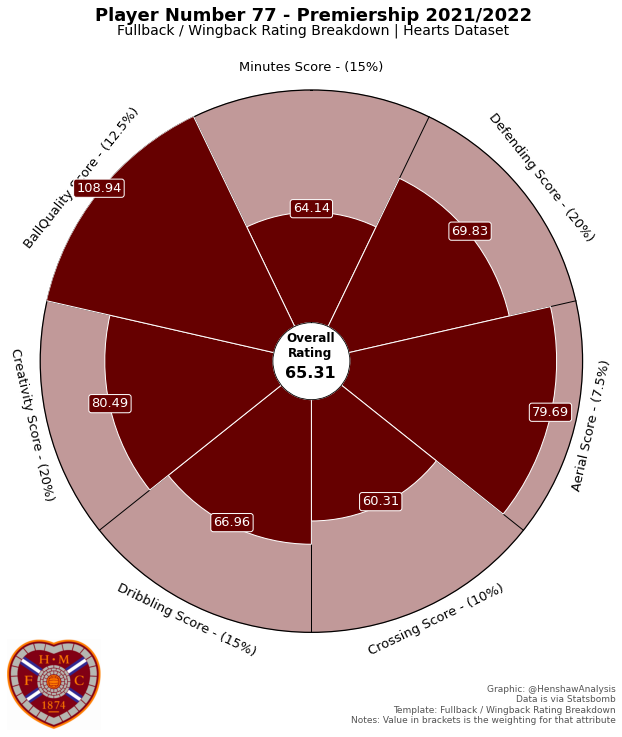

In [760]:
#Rating Breakdown visual

#get parameters
params = list(dfviz.columns)
print(params)

#drop the first list team because we don't need player name. Start at first metric
params = params[1:]

#Input player name or number here
values = dfviz.loc[dfviz['Player']==77].reset_index()
values = list(values.loc[0])
values = values[2:]


#Getting the min and max values for the ranges for the data visual

min_range = []
max_range = []

for x in params:
    a = min(dfviz[params][x])
    
    b = max(dfviz[params][x])

    min_range.append((a))
    max_range.append((b))
    
#Creating pizza chart for rating breakdown visual

baker = PyPizza(
    params=params,
    background_color="white", straight_line_color="#000000",
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=16.5,
)


# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        facecolor="#660000",edgecolor="white", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=13,
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=13,
        bbox=dict(
            edgecolor="white", facecolor="#660000",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# Add Title / Edit Player Name and Club
fig.text(
    0.515, 0.975, "Player Number 77 - Premiership 2021/2022", size=18, fontweight='bold',
    ha="center", color="#000000"
)

# Add Subtitle
fig.text(
    0.515, 0.956,
    "Fullback / Wingback Rating Breakdown | Hearts Dataset",
    size=14,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "Graphic: @HenshawAnalysis"
CREDIT_2 = "Data is via Statsbomb"
CREDIT_3 = "Template: Fullback / Wingback Rating Breakdown"
CREDIT_4 = "Notes: Value in brackets is the weighting for that attribute"

fig.text(
    0.935, 0.000, f"{CREDIT_1}\n{CREDIT_2}\n{CREDIT_3}\n{CREDIT_4}", size=9,
    color="#545454",
    ha="right"
)

fig.text (0.511, 0.509, "Overall\nRating", size=12, ha="center", fontweight='bold')
fig.text (0.511, 0.48, "65.31", size=16, ha="center", fontweight='bold')



# add image

im2 = imageio.imread('HeartsLogo.png')
ax_image = add_image(
    im2, fig, left=0.09, bottom=-0.01, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [761]:
#Weight the overall ratings
df3['Minutes Score - (15%)'] = df3['Minutes Score - (15%)'] *0.15
df3['Defending Score - (20%)'] = df3['Defending Score - (20%)'] *0.2
df3['Aerial Score - (7.5%)'] = df3['Aerial Score - (7.5%)'] *0.075
df3['Crossing Score - (10%)'] = df3['Crossing Score - (10%)'] *0.1
df3['Dribbling Score - (15%)'] = df3['Dribbling Score - (15%)'] *0.15
df3['Creativity Score - (20%)'] = df3['Creativity Score - (20%)'] *0.2
df3['BallQuality Score - (12.5%)'] = df3['BallQuality Score - (12.5%)'] *0.125



df3['FBWB_Rating'] = df3['Minutes Score - (15%)'] + df3['Defending Score - (20%)'] + df3['Aerial Score - (7.5%)'] + df3['Crossing Score - (10%)'] + df3['Creativity Score - (20%)'] + df3['BallQuality Score - (12.5%)']

#Round overall ratings
df3 = df3.round({'FBWB_Rating': 2})

df3.sort_values("FBWB_Rating", ascending=False)



,Player,Competition,Season,Minutes Score - (15%),Defending Score - (20%),Aerial Score - (7.5%),Crossing Score - (10%),Dribbling Score - (15%),Creativity Score - (20%),BallQuality Score - (12.5%),FBWB_Rating
76,77,Premiership,2021/2022,9.6210,13.966,5.97675,6.031,10.0440,16.098,13.61750,65.31
782,783,Eredivisie,2021/2022,8.8590,14.066,5.20575,5.889,12.3630,15.658,12.93875,62.62
519,520,League Two,2021/2022,14.9490,8.824,3.66225,7.422,13.2480,17.768,8.63375,61.26
835,836,Superliga,2021/2022,10.9770,13.018,3.33375,7.205,11.1390,14.528,9.50250,58.56
437,438,Ekstraklasa,2022/2023,5.6940,10.602,4.31550,7.947,9.0900,16.992,12.01500,57.57
198,199,Jupiler Pro League,2021/2022,9.4605,17.038,3.76950,4.561,9.9780,11.518,11.05625,57.40
959,960,Major League Soccer,2021,4.8885,11.292,4.39875,8.810,8.0400,19.784,7.93125,57.10
225,226,Eredivisie,2021/2022,5.6955,17.518,4.13100,4.026,8.0250,14.470,11.07125,56.91
93,94,Allsvenskan,2021,6.9600,12.278,4.45950,7.783,8.4495,15.904,9.42375,56.81
72,73,Jupiler Pro League,2021/2022,7.1625,12.324,4.16550,7.235,12.4245,15.494,10.37375,56.75


In [762]:
#Download as ratings to CSV
df3.to_csv('HeartsDataTaskRatings.csv', index=False)

In [763]:
#PIZZA CHART DATA VISUAL BELOW

In [764]:
#Filter metrics for Pizza Chart

dfviz = df.filter(['PLAYER NUMBER','Successful Crosses','Successful Dribbles','Touches In Box','Dribble & Carry OBV','xGBuildup','Open Play xG Assisted','Open Play Key Passes','Deep Progressions','OP Passes Into Box','Passing%','PAdj Tackles & Interceptions','Dribbles Successfully Defended%','Defensive Action Regains','Aerial Win%','Aerial Wins'], axis=1)



In [765]:
#Rename metrics for visual
dfviz.columns = ['PLAYER NUMBER','Successful Crosses','Successful Dribbles','Touches In Box','Dribble & Carry OBV','xGBuildup','Open Play xG\nAssisted','Open Play Key\nPasses','Deep Progressions','OP Passes Into Box','Passing%','PAdj Tackles &\nInterceptions','Dribbles Successfully\nDefended%','Defensive Action\nRegains','Aerial Win%','Aerial Wins']




In [768]:
dfviz.head()

,PLAYER NUMBER,Successful Crosses,Successful Dribbles,Touches In Box,Dribble & Carry OBV,xGBuildup,Open Play xG\nAssisted,Open Play Key\nPasses,Deep Progressions,OP Passes Into Box,Passing%,PAdj Tackles &\nInterceptions,Dribbles Successfully\nDefended%,Defensive Action\nRegains,Aerial Win%,Aerial Wins
0,1,0.458002,0.356224,0.508891,0.033955,0.325029,0.051887,0.610670,2.798903,0.661559,0.583573,2.660426,0.548387,3.562240,0.420455,1.882898
1,2,1.079047,1.138994,1.019100,0.089134,0.570130,0.146575,1.168967,6.324414,1.498676,0.770096,4.838830,0.573770,5.185420,0.507692,0.989126
2,3,1.094572,0.766201,0.802686,0.083189,0.460124,0.096947,0.875658,5.144491,1.386459,0.771348,4.141391,0.500000,3.539118,0.478261,0.802686
4,5,0.672897,0.348050,1.461811,0.046941,0.230575,0.080711,0.742507,3.921366,1.067354,0.575873,4.084353,0.583333,2.459555,0.641667,5.359974
5,6,0.121682,0.669250,1.155978,0.066534,0.147874,0.022863,0.182523,2.616161,0.486728,0.588865,2.630859,0.625000,2.555320,0.453125,1.764388


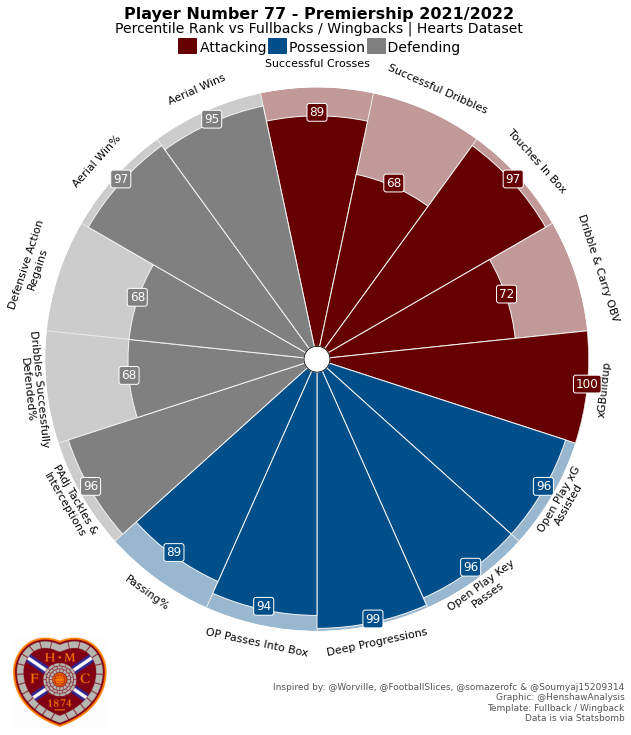

In [767]:
#get parameters
params = list(dfviz.columns)

#drop the first list team because we don't need player name. Start at first metric
params = params[1:]


#NEW DATA FRAME FOR YOUR PLAYER / EDIT NAME
Player = dfviz.loc[dfviz['PLAYER NUMBER']==77].reset_index()
Player = list(Player.loc[0])
Player = Player[2:]

#Creating the percentile rank score
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(dfviz[params[x]],Player[x])))
    
    
# color for the slices and text
slice_colors = ["#660000"] * 5 + ["#014F8A"] * 5 + ["grey"] * 5
text_colors = ["white"] * 15


# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color='white',     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=5            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="white", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Player Number 77 - Premiership 2021/2022", size=16, fontweight='bold',
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.956,
    "Percentile Rank vs Fullbacks / Wingbacks | Hearts Dataset",
    size=14,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "Inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"
CREDIT_2 = "Graphic: @HenshawAnalysis"
CREDIT_3 = "Template: Fullback / Wingback"
CREDIT_4 = "Data is via Statsbomb"

fig.text(
    0.94, 0.000, f"{CREDIT_1}\n{CREDIT_2}\n{CREDIT_3}\n{CREDIT_4}", size=9,
    color="#545454",
    ha="right"
)

# add text
fig.text(
    0.35, 0.93, "Attacking     Possession     Defending", size=14,
    color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.32, 0.9275), 0.025, 0.021, fill=True, color="#660000",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.445, 0.9275), 0.025, 0.021, fill=True, color="#014F8A",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.582, 0.9275), 0.025, 0.021, fill=True, color="grey",
        transform=fig.transFigure, figure=fig
    ),
])

im2 = imageio.imread('HeartsLogo.png')

# add image
ax_image = add_image(
    im2, fig, left=0.09, bottom=-0.01, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()